In [165]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
from sklearn.neighbors import KNeighborsRegressor
from scipy.sparse.linalg import svds 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


# Input data is contained in '../Data/Processed' directory
# This cell lists all files under the input directory

import os
INPUT_DIR = os.path.join(os.path.dirname(os.getcwd()), 'Data', 'Processed')
for dirname, _, filenames in os.walk(INPUT_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\average_ratings_by_user.csv
c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\Books_valid_ISBN_known_year_no_images.csv
c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\matrix_factorization.csv
c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\normalized_user-book_matrix.csv
c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\popular_books_with_descriptions.csv
c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\ratings_for_popular_books.csv
c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\Ratings_valid_ISBN.csv
c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\user-book_matrix.csv
c:\Users\ASUS\Documents\Python Programming\Book recommendations\Data\Processed\user-book_matrix_normalized_withna.csv
c:\Users\ASUS

We load ratings dataframe and book information.

In [150]:
all_ratings_df = pd.read_csv(os.path.join(INPUT_DIR, 'ratings_for_popular_books.csv'))
print(all_ratings_df.head())

   User-ID        ISBN  Book-Rating
0   276788  043935806X            7
1   276925  0385504209            8
2   276953  0446310786           10
3   276964  0440220602            9
4   277042  0971880107            2


In [151]:
books_df = pd.read_csv(os.path.join(INPUT_DIR, 'popular_books_with_descriptions.csv'))
print(books_df.head())

                                              title            authors  \
0                                       Wild Animus   ['Rich Shapero']   
1                                  The Lovely Bones   ['Alice Sebold']   
2                                 The Da Vinci Code      ['Dan Brown']   
3  Divine secrets of the Ya-Ya Sisterhood : a novel  ['Rebecca Wells']   
4                                      The Red Tent  ['Anita Diamant']   

                                         description        ISBN  
0  Wild animus is a search for the primordial, a ...  0971880107  
1  The spirit of fourteen-year-old Susie Salmon d...  0316666343  
2  Harvard symbologist Robert Langdon and French ...  0385504209  
3  A NOVEL ABOUT THE COMPLEX BONDS BETWEEN A MOTH...  0060928336  
4  Her name is Dinah. In the Bible, her life is o...  0312195516  


In [152]:
def compute_user_book_matrix(ratings_df):
    """Takes a dataframe ratings_df with ratings (columns are 'User-ID', 'ISBN' and 'Book-Rating') and creates a normalized user-book matrix.
    Returns a tuple consisting of a user-book matrix dataframe with average rating zero for each user
    and a series of average ratings for users from the original dataframe"""
    user_ratings_pivot = ratings_df.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
    user_average_ratings = user_ratings_pivot.mean(axis=1)
    user_ratings_pivot = user_ratings_pivot.sub(user_average_ratings, axis=0)
    return (user_ratings_pivot, user_average_ratings)

In [153]:
def normalize_user_book(user_book_df):
    """Takes a user-book matrix dataframe and 
    returns a tuple consisting of a user-book matrix dataframe with average rating zero for each user
    and a series of average ratings for users from the original dataframe"""
    user_average_ratings = user_book_df.mean(axis=1)
    user_book_normalized = user_book_df.sub(user_average_ratings, axis=0)
    return (user_book_normalized, user_average_ratings)    

In [154]:
def matrix_factorization(user_book_df, average_ratings):
    """Takes a user_book_matrix_df dataframe containing normalized user-book matrix (no NaNs) 
    and average_ratings series containing average ratings for users
    and returns a dataframe with predicted ratings using SVDs"""
    U, sigma, Vt = svds(user_book_normalized.values)
    sigma = np.diag(sigma)
    predicted_ratings = np.dot(np.dot(U, sigma), Vt)
    predicted_ratings = predicted_ratings + user_average_ratings.values.reshape(-1, 1)
    predicted_ratings_df = pd.DataFrame(predicted_ratings, 
                                    index=user_book_withna.index, 
                                    columns=user_book_withna.columns)
    return predicted_ratings_df

In [155]:
all_user_ratings_pivot = all_ratings_df.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
print(all_user_ratings_pivot.head())

ISBN     0060392452  0060502258  0060928336  0060930535  0060934417  \
User-ID                                                               
26              NaN         NaN         NaN         NaN         NaN   
51              NaN         NaN         NaN         NaN         NaN   
91              NaN         NaN         NaN         NaN         NaN   
114             NaN         NaN         NaN         NaN         NaN   
165             NaN         NaN         NaN         NaN         NaN   

ISBN     0060938455  0060976845  0060987103  006101351X  014028009X  ...  \
User-ID                                                              ...   
26              NaN         NaN         NaN         NaN         NaN  ...   
51              NaN         NaN         NaN         NaN         NaN  ...   
91              NaN         NaN         NaN         NaN         NaN  ...   
114             NaN         NaN         NaN         NaN         NaN  ...   
165             NaN         9.0         NaN   

In [156]:
all_user_book_df, all_average_ratings = compute_user_book_matrix(all_ratings_df)
print(all_user_book_df.head())
print(all_average_ratings.head())

ISBN     0060392452  0060502258  0060928336  0060930535  0060934417  \
User-ID                                                               
26              NaN         NaN         NaN         NaN         NaN   
51              NaN         NaN         NaN         NaN         NaN   
91              NaN         NaN         NaN         NaN         NaN   
114             NaN         NaN         NaN         NaN         NaN   
165             NaN         NaN         NaN         NaN         NaN   

ISBN     0060938455  0060976845  0060987103  006101351X  014028009X  ...  \
User-ID                                                              ...   
26              NaN         NaN         NaN         NaN         NaN  ...   
51              NaN         NaN         NaN         NaN         NaN  ...   
91              NaN         NaN         NaN         NaN         NaN  ...   
114             NaN         NaN         NaN         NaN         NaN  ...   
165             NaN         0.0         NaN   

In [157]:
def user_user_predict_rating(target_user, book_ISBN, user_book_df_withna, user_average_ratings):
    """
    user_book_df_withna: DataFrame with user-book matrix
    user_average_ratings: Series with average rating for each user
    
    Using scikit-learn KNeighborsRegressor with cosine metric, 
    predicts what rating the user will give to the book, 
    based on user-user collaborative filtering"""
    # Fill NaNs with zeroes in the user-book matrix and save it to a new dataframe
    user_book_df = user_book_df_withna.fillna(0)
    
    # Create a list of ratings for our target user without the rating for the target book.
    target_user_x = user_book_df.drop(book_ISBN, axis=1).loc[[target_user]]
    
    # Take all the other users and create a list of ratings they gave to the book.
    # NaNs are included to signify no rating given.
    other_users_y = user_book_df_withna[book_ISBN]
    
    # Get rid of the users that didn't rate the target book, 
    # create a dataframe with all the other ratings they gave.
    other_users_x = user_book_df[other_users_y.notnull()]
    other_users_x = other_users_x.drop(columns=[book_ISBN])
    other_users_y = other_users_y.dropna()
    
    # Using scikit-learn's KNN regressor to predict the rating that our user would give.
    user_knn = KNeighborsRegressor(metric='cosine', n_neighbors=3)
    user_knn.fit(other_users_x, other_users_y)
    user_user_pred = user_knn.predict(target_user_x)
    
    # Return the prediction.
    return user_user_pred + user_average_ratings[target_user]

In [158]:
print(user_user_predict_rating(35859, '014028009X', all_user_book_df, all_average_ratings))

[8.46078431]


In [159]:
all_user_book_df_mf = matrix_factorization(all_user_book_df, all_average_ratings)
print(all_user_book_df_mf.head())

         0060392452  0060502258  0060928336  0060930535  0060934417  \
User-ID                                                               
26             10.0        10.0        10.0        10.0        10.0   
51              9.0         9.0         9.0         9.0         9.0   
91              9.0         9.0         9.0         9.0         9.0   
114            10.0        10.0        10.0        10.0        10.0   
165             9.0         9.0         9.0         9.0         9.0   

         0060938455  0060976845  0060987103  006101351X  014028009X  ...  \
User-ID                                                              ...   
26             10.0        10.0        10.0        10.0        10.0  ...   
51              9.0         9.0         9.0         9.0         9.0  ...   
91              9.0         9.0         9.0         9.0         9.0  ...   
114            10.0        10.0        10.0        10.0        10.0  ...   
165             9.0         9.0         9.0   

Now we define score functions.

In [160]:
def score_average_predictor(to_predict, correct, average_ratings):
    """
    to_predict: list of tuples (book's ISBN, user ID)
    correct: correct rating for every tuple in to_predict list
    average_ratings: average rating every user gives on train set
    
    Returns RMSE for predicting average user rating for a new book
    """
    predictions = []
    for _, user in to_predict:
        predictions.append(average_ratings.loc[user])
    return mean_squared_error(correct, predictions, squared=False)    

In [161]:
def score_matrix_factorization(to_predict, correct, user_book_df, average_ratings):
    """
    to_predict: list of tuples (book's ISBN, user ID)
    correct: correct rating for every tuple in to_predict list
    user_book_df: normalized user-book matrix with NaNs filled by zeroes
    average_ratings: average rating every user gives on train set
    
    Returns RMSE for predicting rating using matrix factorization
    """
    
    user_book_mf_df = matrix_factorization(user_book_df, average_ratings)
    predictions = []
    for book_ISBN, user in to_predict:
        predictions.append(user_book_mf_df.loc[user, book_ISBN])
    return mean_squared_error(correct, predictions, squared=False)

In [162]:
def score_user_user_collaborative_filtering(to_predict, correct, user_book_df_withna, average_ratings):
    """
    to_predict: list of tuples (book's ISBN, user ID)
    correct: correct rating for every tuple in to_predict list
    user_book_df_withna: normalized user-book matrix with NaNs in place of missing values
    average_ratings: average rating every user gives on train set
    
    Returns RMSE for predicting rating using user-user collaborative filtering
    """
#    print(user_book_df_withna.head())
#    print(average_ratings.head())
    predictions = []
    for book_ISBN, user in to_predict:
        predictions.append(user_user_predict_rating(user, book_ISBN, user_book_df_withna, average_ratings))
#    print(predictions)
    return mean_squared_error(correct, predictions, squared=False)

To validate our models, we will cut the user-book matrix into 5x5 matrices. For each small matrix, we will hide the existing ratings there and try to predict them based on the remaining ratings. We will evaluate the predictions using RMSE metric.

In [163]:
kf_users = KFold(n_splits=5, shuffle=True, random_state=42)
kf_users.get_n_splits(all_user_book_df.index)
kf_books = KFold(n_splits=5, shuffle=True, random_state=42)
kf_books.get_n_splits(all_user_book_df.columns)
scores_ap = []
scores_mf = []
scores_cf = []
for train_books, test_books in kf_books.split(all_user_book_df.columns):
    for train_users, test_users in kf_users.split(all_user_book_df.index):
        train_user_book_df = all_user_ratings_pivot.copy()
        train_user_book_df.iloc[train_users, train_books] = np.nan
        train_user_book_df, train_average = normalize_user_book(train_user_book_df)
        test_user_book_df = all_user_ratings_pivot.iloc[test_users, test_books]
        test_couples = []
        test_ratings = []
        for book in test_books:
            book_ISBN = all_user_book_df.columns[book]
            known_ratings_df = test_user_book_df[book_ISBN][~(test_user_book_df[book_ISBN].isna())]
            for user in known_ratings_df.index:
                test_couples.append((book_ISBN, user))
                test_ratings.append(test_user_book_df.loc[user, book_ISBN])
        scores_ap.append(score_average_predictor(test_couples, test_ratings, train_average))
        scores_mf.append(score_matrix_factorization(test_couples, test_ratings, train_user_book_df.fillna(0), train_average)) 
        scores_cf.append(score_user_user_collaborative_filtering(test_couples, test_ratings, train_user_book_df, train_average))

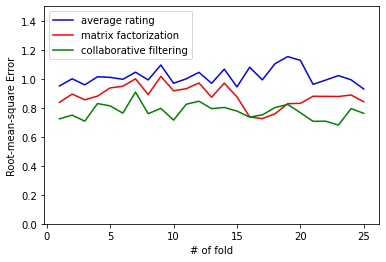

In [172]:
x = range(1, 26)
plt.plot(x, scores_ap, color='blue', label='average rating')
plt.plot(x, scores_mf, color='red', label='matrix factorization')
plt.plot(x, scores_cf, color='green', label='collaborative filtering')
plt.ylim((0, 1.5))
plt.xlabel('# of fold')
plt.ylabel('Root-mean-square Error')
plt.legend()
plt.show()